In [1]:
from fenics import *
from dolfin_adjoint import *
import pygmsh_mesh_functions
from pygmsh_mesh_functions import *
import meshio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import skimage.io
from skimage.measure import find_contours, subdivide_polygon, approximate_polygon

## Clipped random wave model

Input parameters

In [3]:
alpha = 2e-2

Kx = 36
Ky = 27

Sampling

In [4]:
n_wave = 500
n_x = 100
n_y = 100

x = np.arange(n_x)/n_x
y = np.arange(n_y)/n_y

xx, yy = np.meshgrid(x,y)

phi = np.zeros_like(xx)

for i in range(n_wave):
    theta = np.random.rand()*2*pi
    k_i = np.array([Kx*np.cos(theta),Ky*np.sin(theta)])
    
    phase = np.random.rand()*2*np.pi
    phi_i = np.exp(1j*(k_i[0]*xx + k_i[1]*yy + phase))
    
    phi = phi + phi_i
    
phi = phi/n_wave
phi_real = np.real(phi)

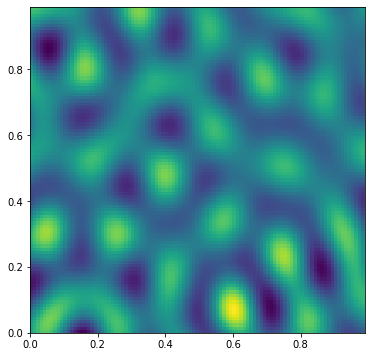

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.pcolor(xx,yy,phi_real)

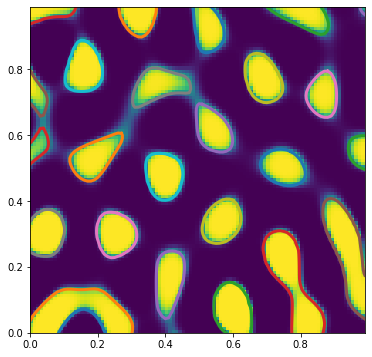

In [6]:
markers = np.tanh((phi_real-alpha)*100)
# markers[:, 0] = -1
# markers[:,-1] = -1
# markers[ 0,:] = -1
# markers[-1,:] = -1

img = markers
imsize = img.shape
contours_list = find_contours(img, 0)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.pcolor(xx,yy,markers)
for i in range(len(contours_list)):
    ax.plot(np.array(contours_list[i].T)[1]/imsize[0],np.array(contours_list[i].T)[0]/imsize[1],'-',linewidth=3)

In [7]:
imsize[0]

100

## Generate Mesh

Info    : Running '/home/fenics/.local/bin/gmsh -3 /tmp/tmp2mj532zd.geo -format msh -bin -o /tmp/tmpfknnxbpo.msh' [Gmsh 4.9.5, 1 node, max. 1 thread]
Info    : Started on Tue May 17 18:19:20 2022
Info    : Reading '/tmp/tmp2mj532zd.geo'...
Info    : Done reading '/tmp/tmp2mj532zd.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 6702 (Line)
Info    : [ 10%] Meshing curve 6703 (Line)
Info    : [ 10%] Meshing curve 6704 (Line)
Info    : [ 10%] Meshing curve 6705 (Line)
Info    : [ 10%] Meshing curve 6706 (Line)
Info    : [ 10%] Meshing curve 6707 (Line)
Info    : [ 10%] Meshing curve 6708 (Line)
Info    : [ 10%] Meshing curve 6709 (Line)
Info    : [ 10%] Meshing curve 6710 (Line)
Info    : [ 10%] Meshing curve 6711 (Line)
Info    : [ 10%] Meshing curve 6712 (Line)
Info    : [ 10%] Meshing curve 6713 (Line)
Info    : [ 10%] Meshing curve 6714 (Line)
Info    : [ 10%] Meshing curve 6715 (Line)
Info    : [ 10%] Meshing curve 6716 (Line)
Info    : [ 10%] Meshing curve 6717 (Line)
In

Info    : Done meshing 2D (Wall 0.264533s, CPU 0.264529s)
Your choice of mesh element sizes will likely produce a very
large mesh. Do you really want to continue?

(To disable this warning in the future, select `Enable expert mode'
in the option dialog.)

0=[Cancel] 1=[Continue] (default=1): Info    : Meshing 3D...
Info    : Done meshing 3D (Wall 2.37001e-05s, CPU 2.6e-05s)
Info    : 7044 nodes 14711 elements
Info    : Writing '/tmp/tmpfknnxbpo.msh'...
Info    : Done writing '/tmp/tmpfknnxbpo.msh'
Info    : Stopped on Tue May 17 18:19:21 2022 (From start: Wall 1.17051s, CPU 1.31553s)


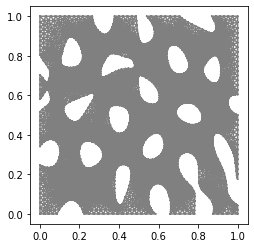

In [8]:
from img2mesh import *
img2mesh(img, "test_spinodal.xdmf", meshsize_min = 0.025, meshsize_max = 0.05)